In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pdf2image as pdf
import re

In [ ]:
images = pdf.convert_from_path("Sanskrit_Text.pdf",500)

In [5]:
j=1
for i in images:
    path = "data/img"+str(j)+".png"
    i.save(path)
    j+=1

# 1.Using Closing

In [3]:
import pytesseract
import re
pytesseract.pytesseract.tesseract_cmd=r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Removing English Text

(-0.5, 4249.5, 5499.5, -0.5)

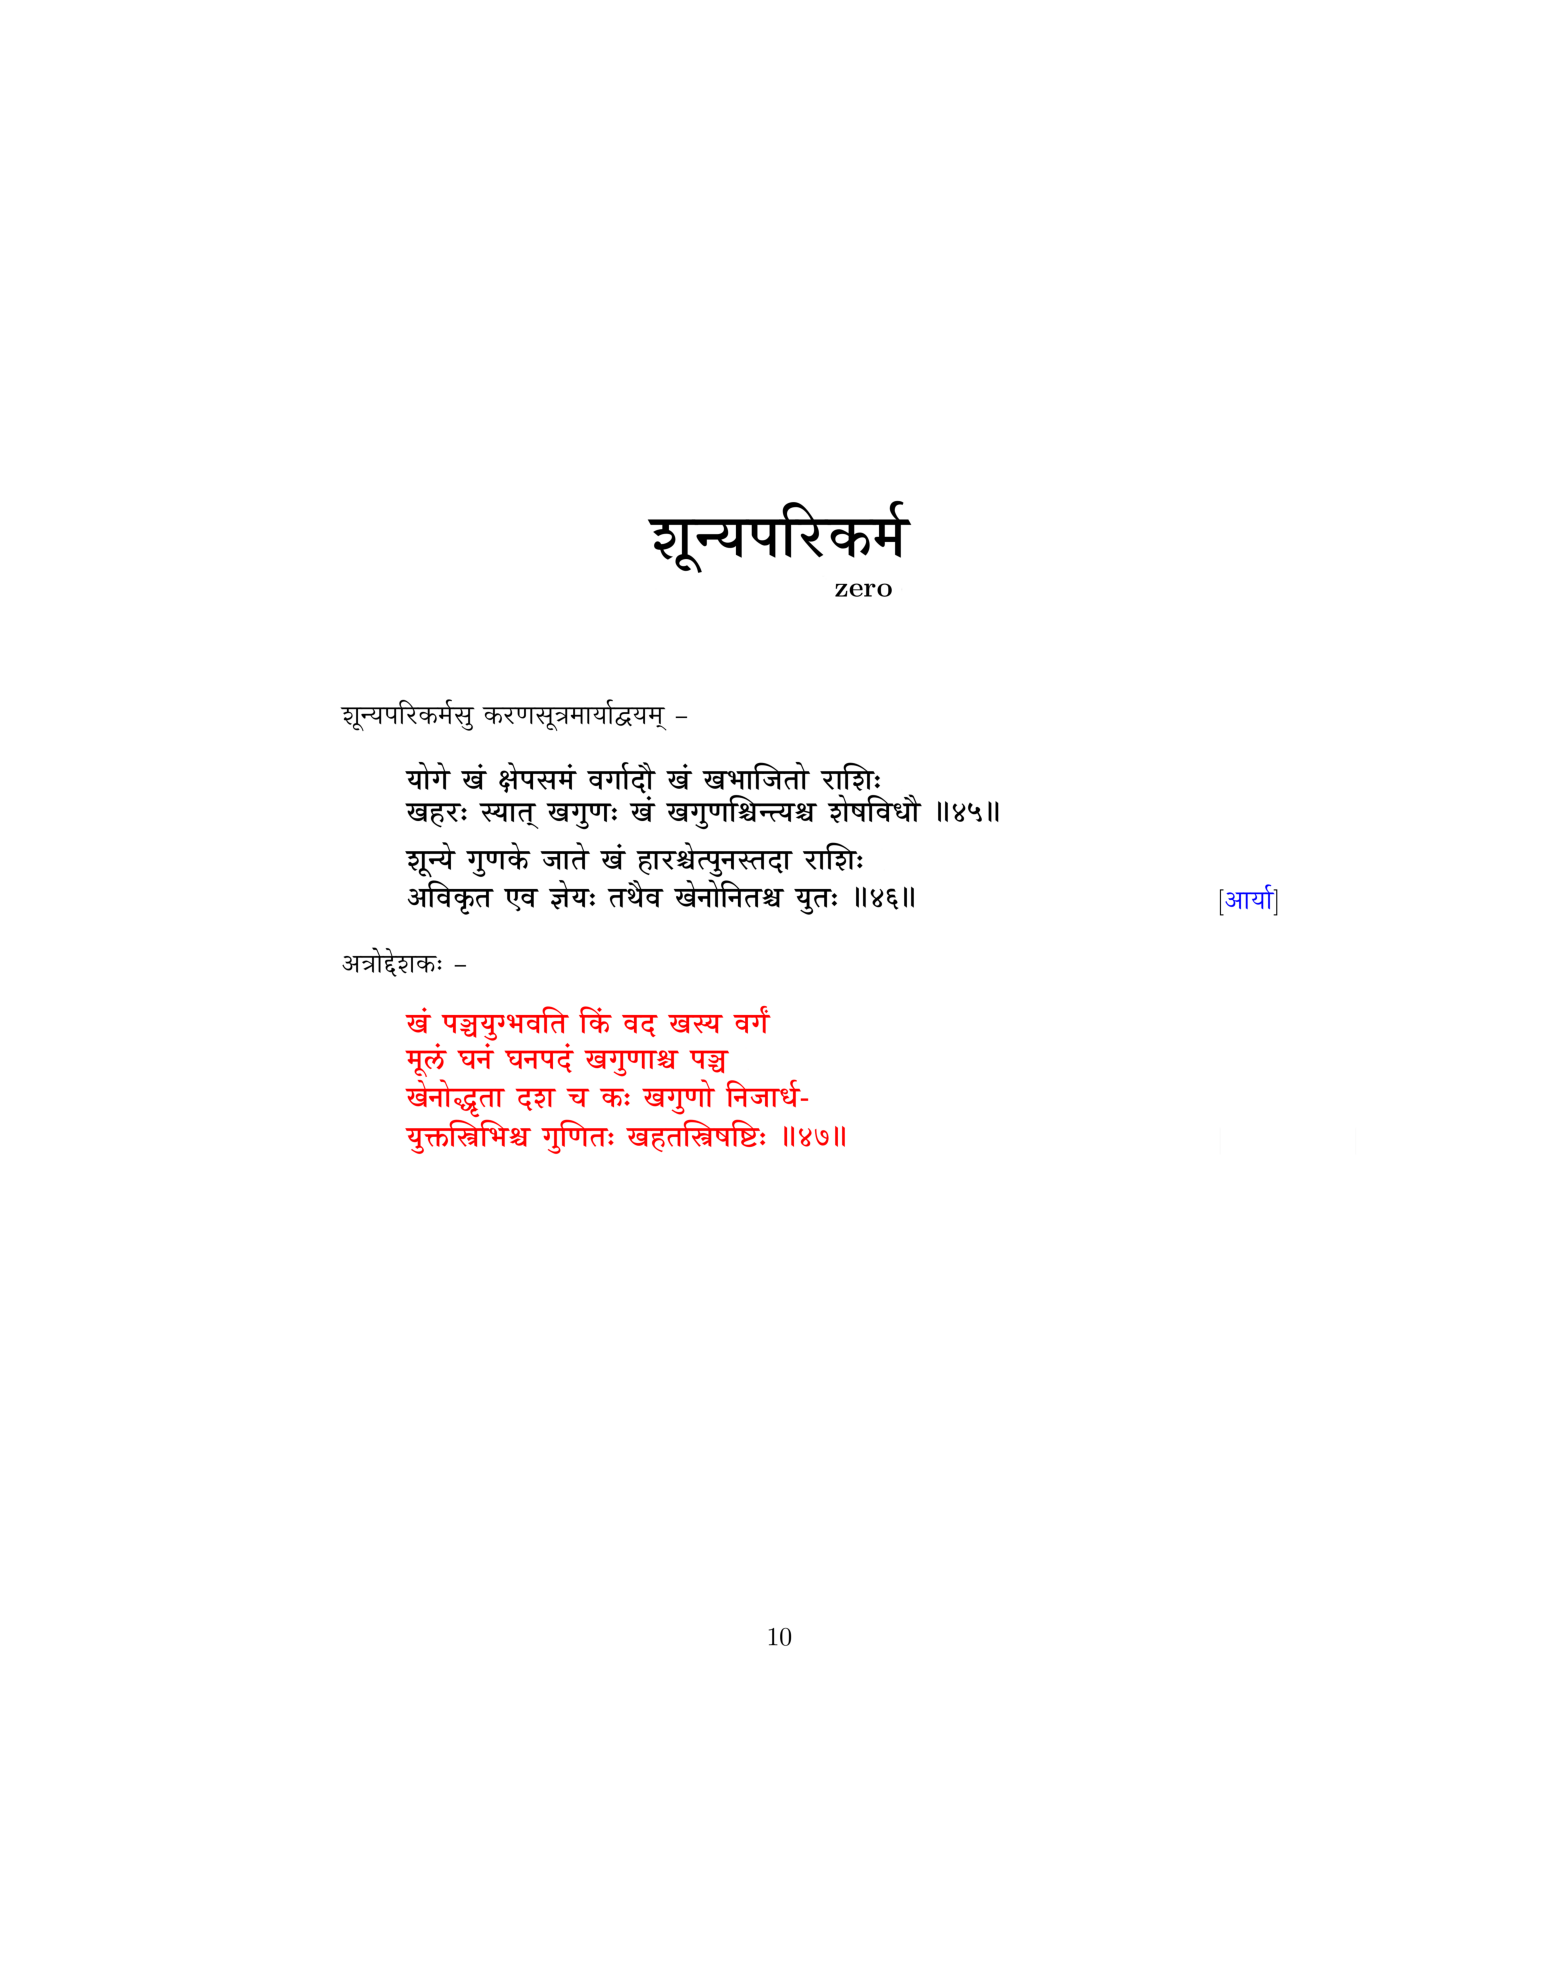

In [8]:
img = cv.imread("data/img2.png")
img1 = cv.cvtColor(img,cv.COLOR_BGR2RGB)
#converting to grayscale
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
#applying gaussian blur
blur = cv.GaussianBlur(gray,(3,3),0)
#thresholding to convert into binary
thresholded = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY_INV,51,9)
#dilate image to connect text contours
kernel = cv.getStructuringElement(cv.MORPH_RECT,(15,1))
dilated = cv.morphologyEx(thresholded,cv.MORPH_CLOSE,kernel)
#get external contours
contours = cv.findContours(dilated,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours)==2 else contours[1]
#draw contours
result = img1.copy()
for points in contours:
    pad = 3
    x,y,w,h = cv.boundingRect(points)
    box = result[y:y+h,x:x+w,:]
#     cv.rectangle(result,(x-pad,y-pad),(x+w+pad,y+h+pad),(0,0,255),4)
    text = pytesseract.image_to_string(box,lang='eng')
    if(text==''):
#         result[y:y+h,x:x+w,:] = np.ones((h,w,3),dtype='uint8')*255
        pass
    else:
#         pass
        result[y:y+h,x:x+w,:] = np.ones((h,w,3),dtype='uint8')*255
plt.figure(figsize=(5,5),dpi=500)
plt.imshow(result)
# plt.imsave("ouput.png",result)
plt.axis('off')

(-0.5, 4249.5, 5499.5, -0.5)

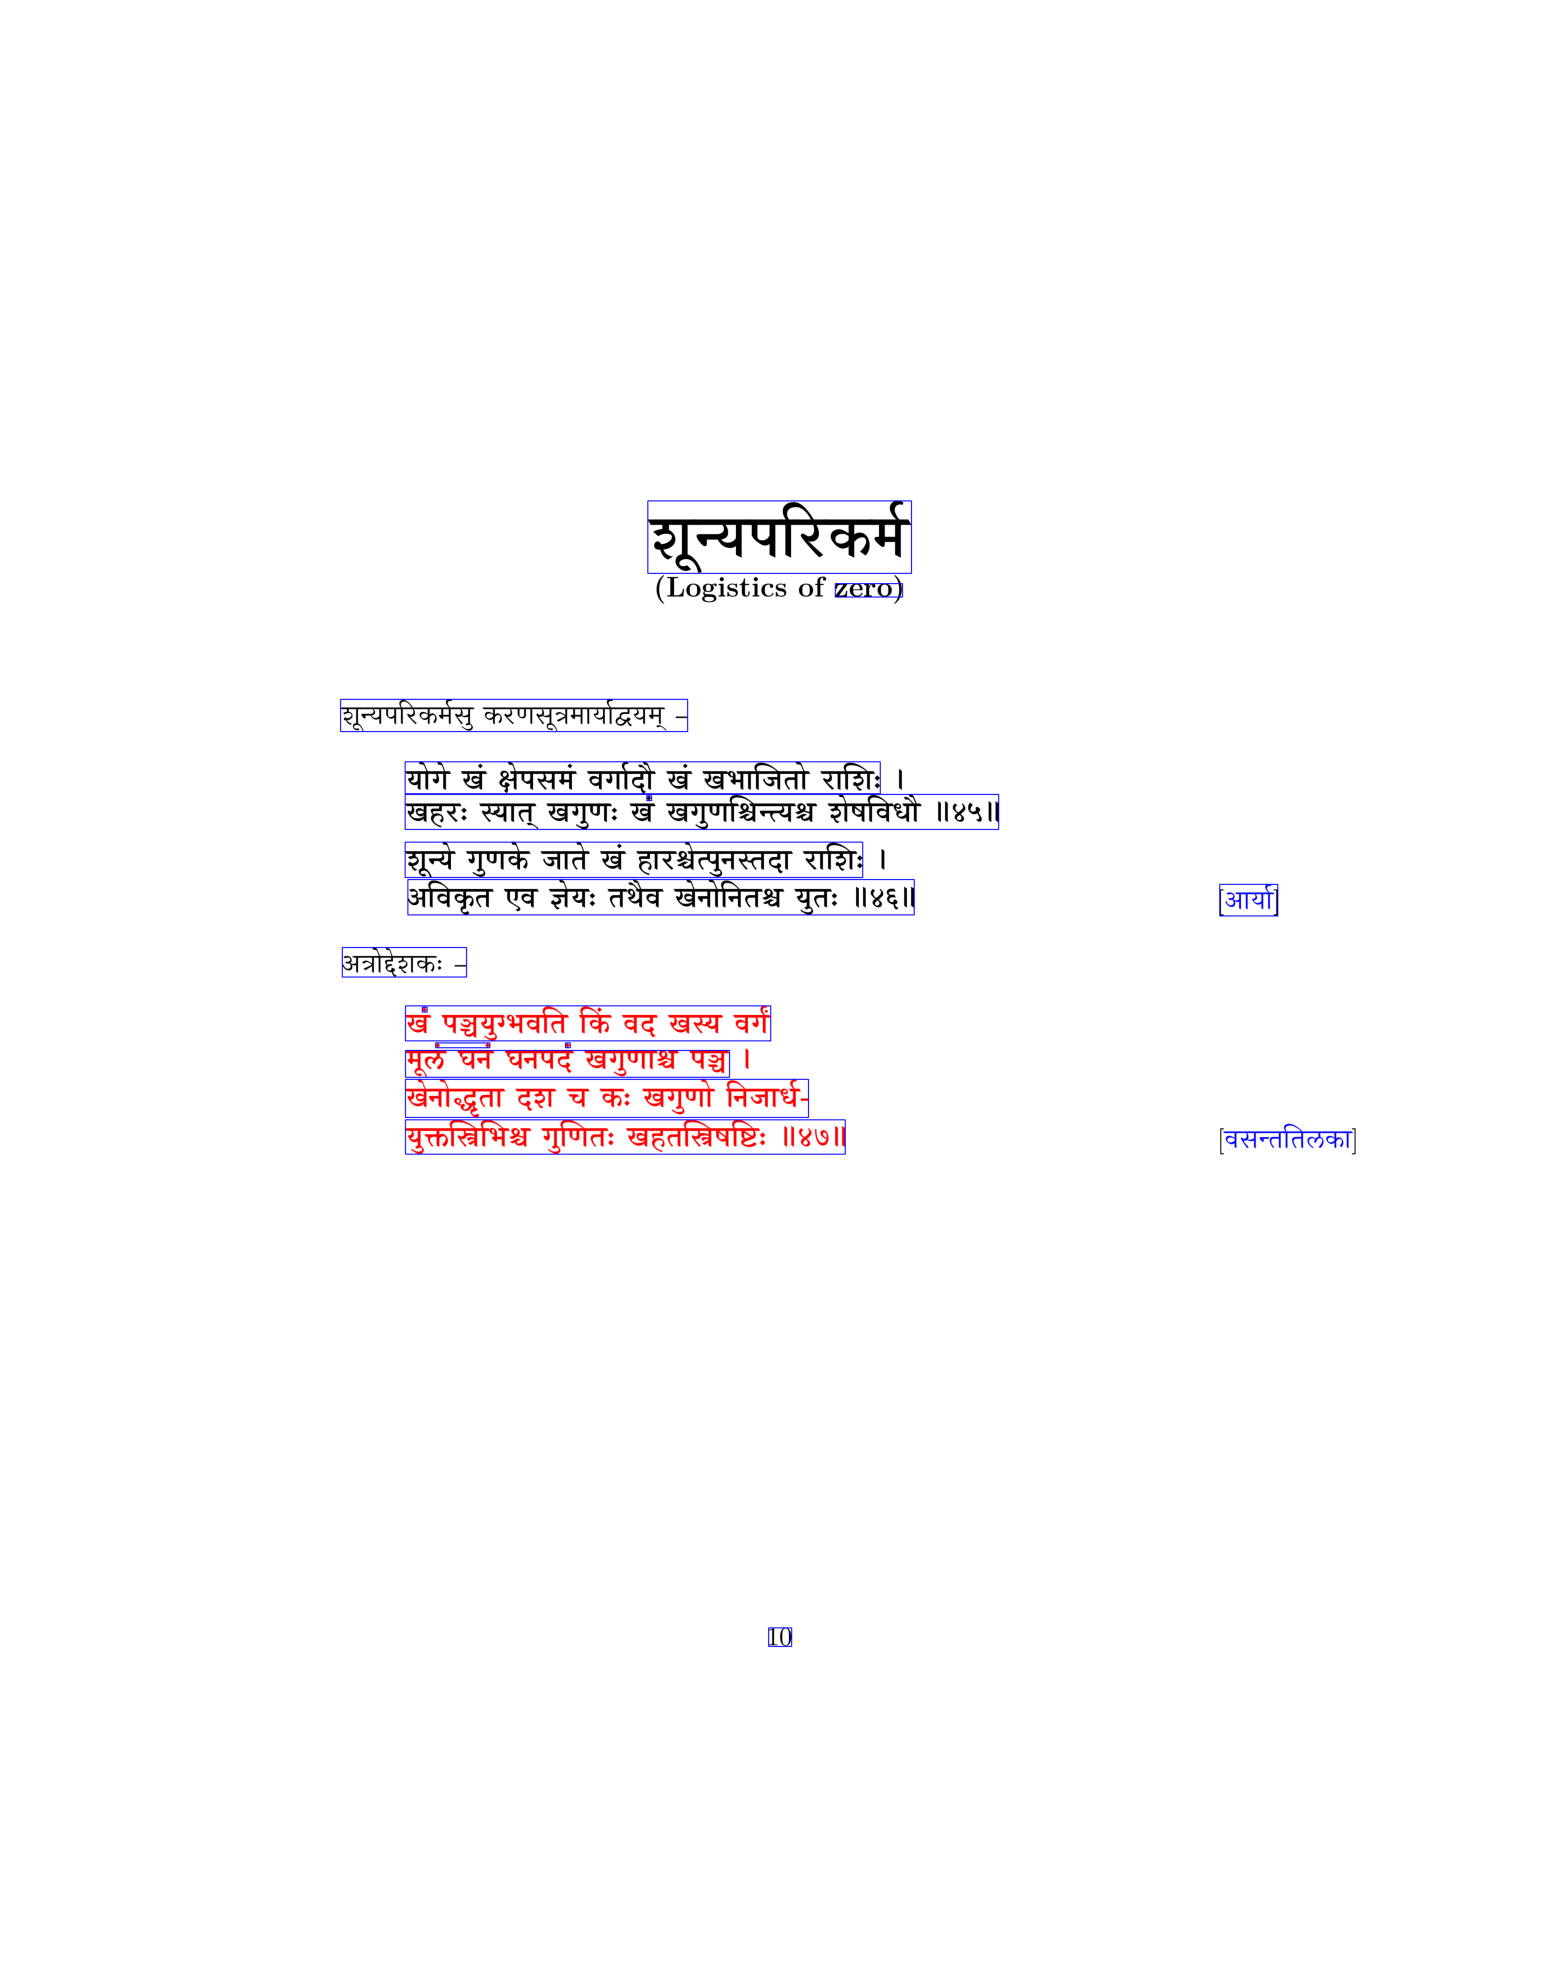

In [9]:
img = cv.imread("data/img2.png")
img1 = cv.cvtColor(img,cv.COLOR_BGR2RGB)
img2 = result.copy()
#converting to grayscale
gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
#applying gaussian blur
blur = cv.GaussianBlur(gray,(3,3),0)
#thresholding to convert into binary
thresholded = cv.adaptiveThreshold(blur,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY_INV,91,9)
#dilate image to connect text contours
kernel = cv.getStructuringElement(cv.MORPH_RECT,(199,1))
dilated = cv.morphologyEx(thresholded,cv.MORPH_CLOSE,kernel)
#get external contours
contours = cv.findContours(dilated,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours)==2 else contours[1]
#draw contours
for points in contours:
    pad = 10
    x,y,w,h = cv.boundingRect(points)
    cv.rectangle(img1,(x,y),(x+w,y+h),(0,0,255),2)
plt.figure(figsize=(5,5),dpi=500)
plt.imshow(img1)
plt.axis('off')

((5500, 4250, 3),
 array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [

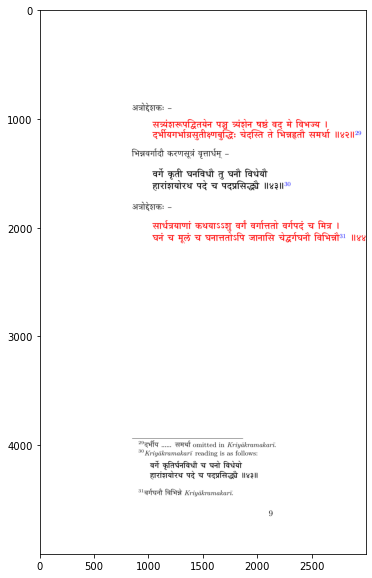

In [19]:
result.shape,result[1:50,3:100,:],plt.figure(figsize=(10,10)),plt.imshow(result[1:5000,3:3000,:])